In [1]:
from qiskit import *
import numpy as np
import matplotlib as mpl
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.tools.monitor import job_monitor

state_sim = Aer.get_backend('statevector_simulator')
qasm_sim = Aer.get_backend('qasm_simulator')
unitary_sim = Aer.get_backend('unitary_simulator')

qiskit.__qiskit_version__   ## developed in q0.14.0, q-terra0.11.0

{'qiskit-terra': '0.11.0',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.4',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.14.0'}

In [2]:
## Definition of c_Increment, c_Decrement gates

def increment(qc,qr):
    """controlled-increment gate, cf. PhysRevA.72.032329"""
    for i in range(num_qubits - 1):
        qc.mct(qr[0:num_qubits - 1 - i],
               qr[num_qubits - 1 - i],
               qr_aux)
        
def decrement(qc,qr):
    """controlled-decrement gate, cf. PhysRevA.72.032329"""
    for i in range(num_qubits - 1):
        qc.mct(qr[0:i+1],
               qr[i+1],
               qr_aux)

In [3]:
## Definition of QW step

def quantum_walk(qc,qr,n):
    """implement DTQW on a previously defined circuit and register cf. PhysRevA.72.032329"""
    for i in range(n):
        ## coin operator
        qc.h(qr[0])

        ## shift right
        increment(qc,qr)
        
        ## shift left
        qc.x(qr[0])
        decrement(qc,qr)
        
        ## back to original state
        qc.x(qr[0])
        
        qc.barrier()

In [4]:
## PARAMETERS : number of qubits and steps
num_qubits = 4
num_steps = 1

In [5]:
## Define qRegister and cRegister
qr = QuantumRegister(num_qubits, 'qr')
cr = ClassicalRegister(num_qubits - 1, 'cr')

## Define qCircuit
## We need aux qubits for the mct gates: (num_qubits - 3)
if num_qubits > 3:
    qr_aux = QuantumRegister(num_qubits - 3, 'aux')
    qc = QuantumCircuit(qr, qr_aux, cr)
else:
    qr_aux = None
    qc = QuantumCircuit(qr, cr)

In [6]:
## Initialization of the nodes 
qc.x(qr[num_qubits-1]) # Initial state = 1000000...0000
qc.barrier()

## Initialization of the coin (symmetrical)
qc.h(qr[0])
qc.s(qr[0])
qc.barrier()

In [7]:
## Repeat the quantum walk for num_steps
quantum_walk(qc, qr, num_steps)

## Measure the node qubits
qc.measure(qr[1:num_qubits], cr)

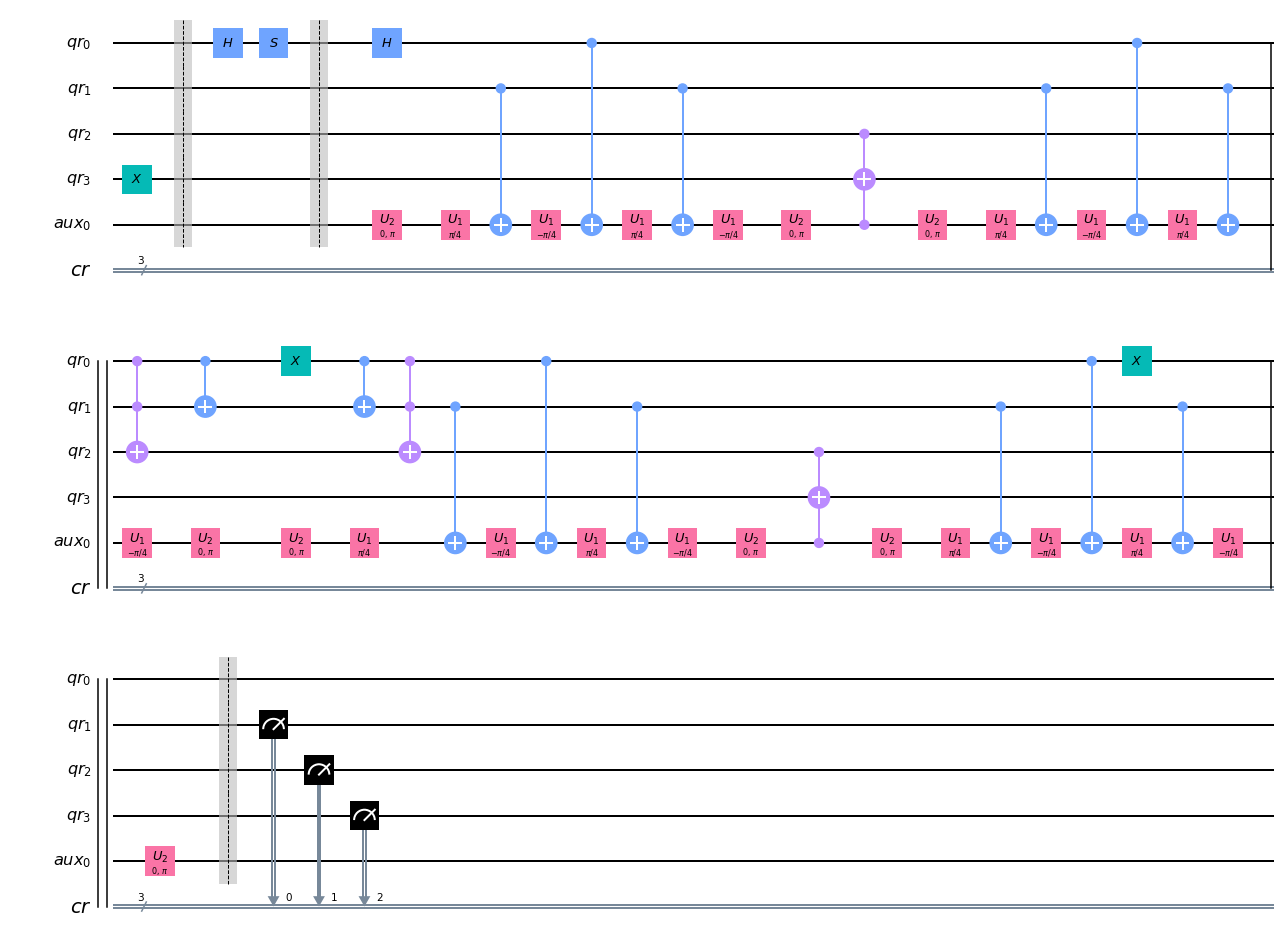

In [8]:
qc.draw(output='mpl')

In [9]:
qc.depth()

43

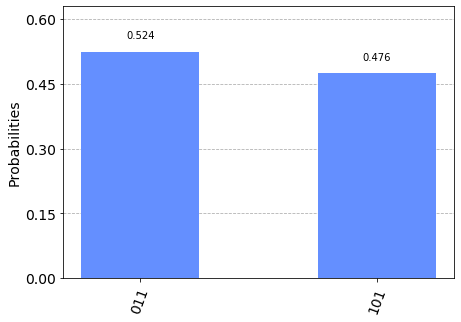

In [14]:
job = execute(qc, backend = qasm_sim)
shots = job.result().get_counts()

plot_histogram(shots)